In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
# 그래프의 한글 깨짐 처리
plt.rcParams["font.family"] = "Malgun Gothic"

In [3]:
# 파일 경로
file_path = r"D:\SEOUL\2024서울시인구통계.xlsx"

# 엑셀 파일 읽기
seoul = pd.read_excel(file_path)

# 데이터 확인 (앞부분만 출력)
print(seoul.head())

   자치구     총인구      남자      여자   내국인전체   내국인남자   내국인여자  외국인전체  외국인남자  외국인여자  \
0  종로구  144486   68604   75882  132177   63410   68767  12309   5194   7115   
1   중구  126899   60550   66349  115712   55459   60253  11187   5091   6096   
2  용산구  203401   97246  106155  190640   90649   99991  12761   6597   6164   
3  성동구  274688  132827  141861  264538  128415  136123  10150   4412   5738   
4  광진구  345130  164812  180318  323153  155402  167751  21977   9410  12567   

   ...    일반가구  집단가구  외국인가구   주택전체   단독주택   아파트   연립주택  다세대주택  비주거용건물   그외거주  
0  ...   64643   107   5491  47156  11556  16345  5548  12849     858   7360  
1  ...   59849    93   4874  44572   5688  28409  1871   7777     827   8447  
2  ...   93491    68   4839  78063  13226  39915  3998  20266     658   7342  
3  ...  122894    65   4672  91231   9295  68086  1998  10896     956   7618  
4  ...  158609    78  10544  95631  14749  35199  4212  40082    1389  10511  

[5 rows x 21 columns]


In [4]:
# 데이터 기본 정보 (행/열 개수, 데이터 타입, 결측치 등)
print(seoul.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   자치구     25 non-null     object
 1   총인구     25 non-null     int64 
 2   남자      25 non-null     int64 
 3   여자      25 non-null     int64 
 4   내국인전체   25 non-null     int64 
 5   내국인남자   25 non-null     int64 
 6   내국인여자   25 non-null     int64 
 7   외국인전체   25 non-null     int64 
 8   외국인남자   25 non-null     int64 
 9   외국인여자   25 non-null     int64 
 10  가구전체    25 non-null     int64 
 11  일반가구    25 non-null     int64 
 12  집단가구    25 non-null     int64 
 13  외국인가구   25 non-null     int64 
 14  주택전체    25 non-null     int64 
 15  단독주택    25 non-null     int64 
 16  아파트     25 non-null     int64 
 17  연립주택    25 non-null     int64 
 18  다세대주택   25 non-null     int64 
 19  비주거용건물  25 non-null     int64 
 20  그외거주    25 non-null     int64 
dtypes: int64(20), object(1)
memory usage: 4.2+ KB
None


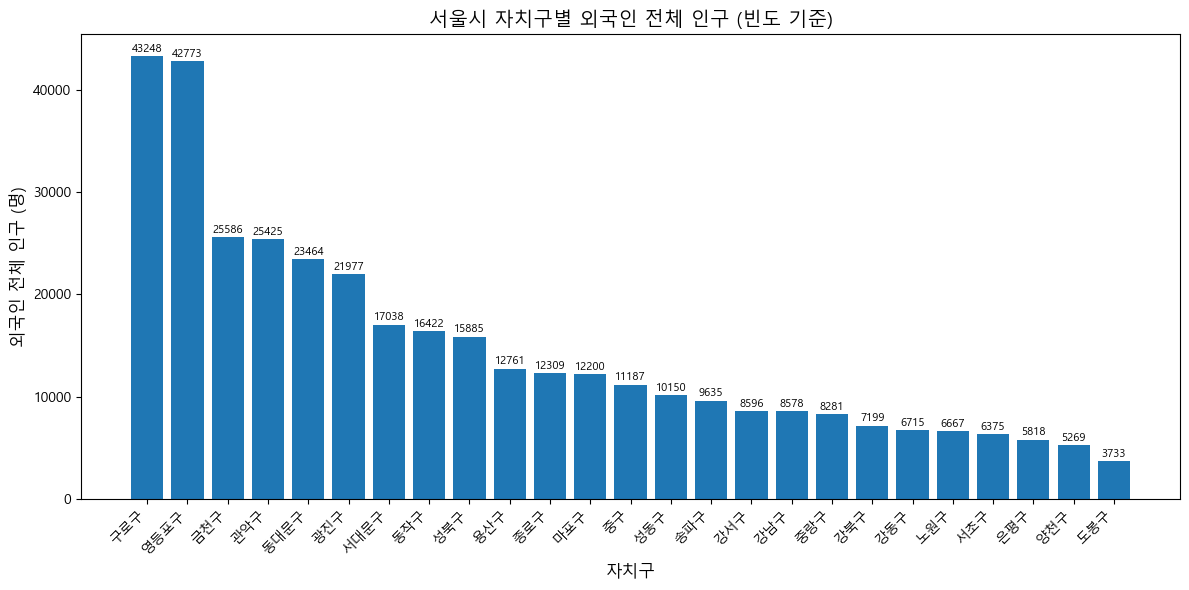

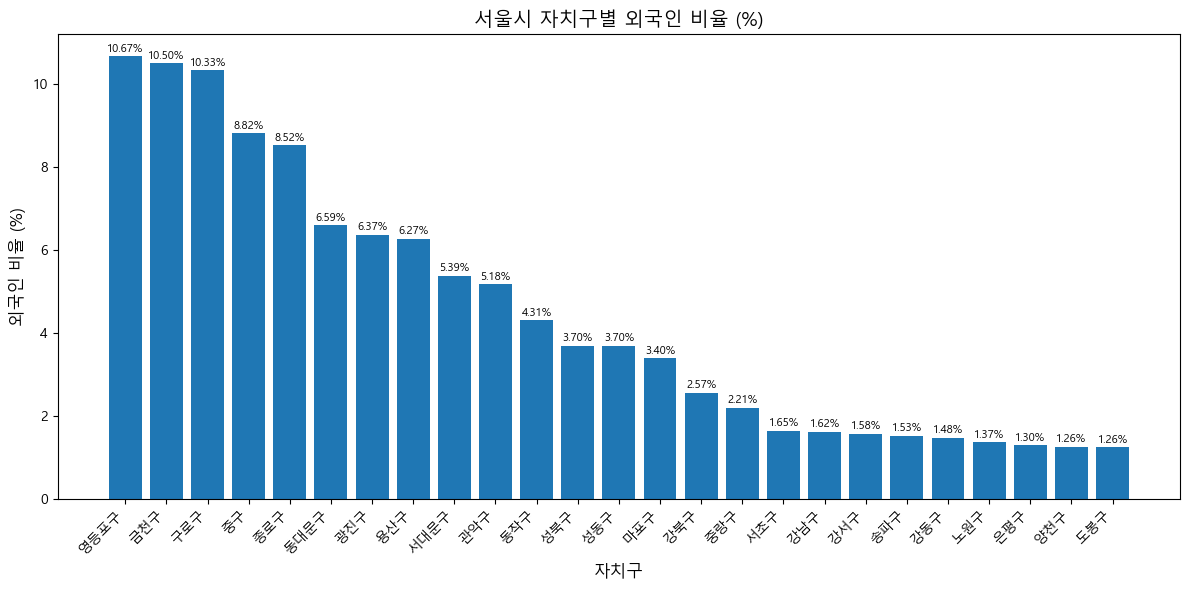

     자치구     총인구  외국인전체   외국인비율(%)
0    종로구  144486  12309   8.519164
1     중구  126899  11187   8.815672
2    용산구  203401  12761   6.273814
3    성동구  274688  10150   3.695101
4    광진구  345130  21977   6.367745
5   동대문구  355789  23464   6.594920
6    중랑구  375066   8281   2.207878
7    성북구  429210  15885   3.700986
8    강북구  280470   7199   2.566763
9    도봉구  296997   3733   1.256915
10   노원구  486446   6667   1.370553
11   은평구  448142   5818   1.298249
12  서대문구  316345  17038   5.385892
13   마포구  358927  12200   3.399020
14   양천구  417397   5269   1.262347
15   강서구  543974   8596   1.580223
16   구로구  418832  43248  10.325859
17   금천구  243662  25586  10.500612
18  영등포구  400799  42773  10.671933
19   동작구  381172  16422   4.308291
20   관악구  490493  25425   5.183560
21   서초구  386254   6375   1.650468
22   강남구  528194   8578   1.624025
23   송파구  628648   9635   1.532654
24   강동구  454023   6715   1.479000


In [5]:
# 외국인 비율(%) 계산
seoul["외국인비율(%)"] = (seoul["외국인전체"] / seoul["총인구"]) * 100

# ---------------------------
# 1. 외국인 '빈도' 기준 정렬
# ---------------------------
seoul_freq_sorted = seoul.sort_values(by="외국인전체", ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(seoul_freq_sorted["자치구"], seoul_freq_sorted["외국인전체"])
plt.title("서울시 자치구별 외국인 전체 인구 (빈도 기준)", fontsize=14)
plt.xlabel("자치구", fontsize=12)
plt.ylabel("외국인 전체 인구 (명)", fontsize=12)
plt.xticks(rotation=45, ha="right")

# 값 표시
for i, v in enumerate(seoul_freq_sorted["외국인전체"]):
    plt.text(i, v + max(seoul_freq_sorted["외국인전체"])*0.01, str(v), ha="center", fontsize=8)

plt.tight_layout()
plt.show()

# ---------------------------
# 2. 외국인 '비율' 기준 정렬
# ---------------------------
seoul_ratio_sorted = seoul.sort_values(by="외국인비율(%)", ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(seoul_ratio_sorted["자치구"], seoul_ratio_sorted["외국인비율(%)"])
plt.title("서울시 자치구별 외국인 비율 (%)", fontsize=14)
plt.xlabel("자치구", fontsize=12)
plt.ylabel("외국인 비율 (%)", fontsize=12)
plt.xticks(rotation=45, ha="right")

# 값 표시
for i, v in enumerate(seoul_ratio_sorted["외국인비율(%)"]):
    plt.text(i, v + max(seoul_ratio_sorted["외국인비율(%)"])*0.01, f"{v:.2f}%", ha="center", fontsize=8)

plt.tight_layout()
plt.show()

# ---------------------------
# 3. 데이터프레임 출력
# ---------------------------
print(seoul[["자치구", "총인구", "외국인전체", "외국인비율(%)"]])

In [6]:
# 구간 기준 정의
bins = [0, 4000, 8000, 12000, 20000, float("inf")]
labels = ["매우 적음", "적음", "보통", "많음", "매우 많음"]

# 새 열 생성 (자치구Group)
seoul["자치구Group"] = pd.cut(seoul["외국인전체"], bins=bins, labels=labels, right=False)

# 확인
print(seoul[["자치구", "외국인전체", "자치구Group"]])

     자치구  외국인전체 자치구Group
0    종로구  12309       많음
1     중구  11187       보통
2    용산구  12761       많음
3    성동구  10150       보통
4    광진구  21977    매우 많음
5   동대문구  23464    매우 많음
6    중랑구   8281       보통
7    성북구  15885       많음
8    강북구   7199       적음
9    도봉구   3733    매우 적음
10   노원구   6667       적음
11   은평구   5818       적음
12  서대문구  17038       많음
13   마포구  12200       많음
14   양천구   5269       적음
15   강서구   8596       보통
16   구로구  43248    매우 많음
17   금천구  25586    매우 많음
18  영등포구  42773    매우 많음
19   동작구  16422       많음
20   관악구  25425    매우 많음
21   서초구   6375       적음
22   강남구   8578       보통
23   송파구   9635       보통
24   강동구   6715       적음


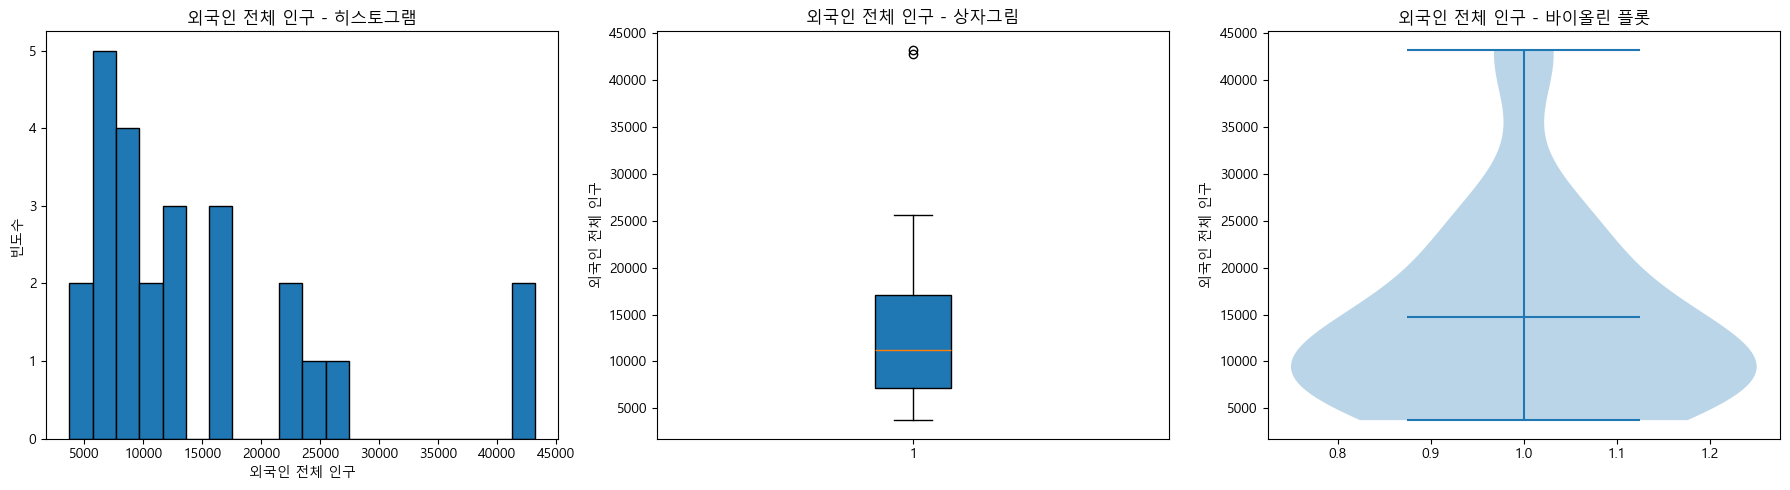

In [7]:
# Figure와 Subplot 생성 (1행 3열)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# -------------------------
# 1. 히스토그램
# -------------------------
axes[0].hist(seoul["외국인전체"], bins=20, edgecolor="black")
axes[0].set_title("외국인 전체 인구 - 히스토그램")
axes[0].set_xlabel("외국인 전체 인구")
axes[0].set_ylabel("빈도수")

# -------------------------
# 2. 상자그림 (Boxplot)
# -------------------------
axes[1].boxplot(seoul["외국인전체"], vert=True, patch_artist=True)
axes[1].set_title("외국인 전체 인구 - 상자그림")
axes[1].set_ylabel("외국인 전체 인구")

# -------------------------
# 3. 바이올린 플롯 (Violin plot)
# -------------------------
axes[2].violinplot(seoul["외국인전체"], vert=True, showmeans=True)
axes[2].set_title("외국인 전체 인구 - 바이올린 플롯")
axes[2].set_ylabel("외국인 전체 인구")

# 레이아웃 조정
plt.tight_layout()
plt.show()


In [8]:
# 기본 기술통계량
stats = seoul["외국인전체"].describe()

# 확장 통계량 추가
stats["var"] = seoul["외국인전체"].var()      # 분산
stats["skew"] = seoul["외국인전체"].skew()    # 왜도
stats["kurt"] = seoul["외국인전체"].kurt()    # 첨도

print(stats)

count    2.500000e+01
mean     1.469164e+04
std      1.062337e+04
min      3.733000e+03
25%      7.199000e+03
50%      1.118700e+04
75%      1.703800e+04
max      4.324800e+04
var      1.128560e+08
skew     1.630012e+00
kurt     2.356508e+00
Name: 외국인전체, dtype: float64


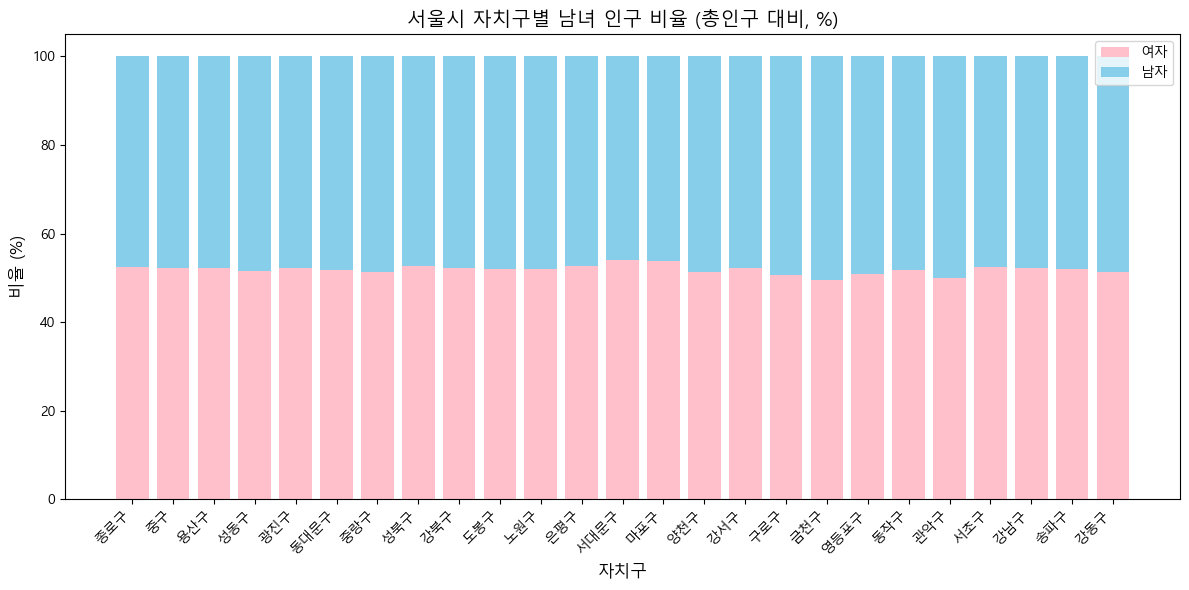

     자치구     총인구   내국인여자    여자비율(%)   내국인남자    남자비율(%)
0    종로구  144486   68767  52.518583   63410  47.481417
1     중구  126899   60253  52.284888   55459  47.715112
2    용산구  203401   99991  52.190009   90649  47.809991
3    성동구  274688  136123  51.644411  128415  48.355589
4    광진구  345130  167751  52.246400  155402  47.753600
5   동대문구  355789  170000  51.768042  162325  48.231958
6    중랑구  375066  187773  51.377891  179012  48.622109
7    성북구  429210  216182  52.664197  197143  47.335803
8    강북구  280470  141950  52.282241  131321  47.717759
9    도봉구  296997  151934  51.965171  141330  48.034829
10   노원구  486446  249421  52.092935  230358  47.907065
11   은평구  448142  232876  52.733509  209448  47.266491
12  서대문구  316345  159616  54.125401  139691  45.874599
13   마포구  358927  185132  53.697827  161595  46.302173
14   양천구  417397  211143  51.331706  200985  48.668294
15   강서구  543974  279170  52.230805  256208  47.769195
16   구로구  418832  191912  50.532194  183672  49.467806
17   금천구  

In [9]:
# 여자/남자 인구 비율 계산
seoul["여자비율(%)"] = (seoul["여자"] / seoul["총인구"]) * 100
seoul["남자비율(%)"] = (seoul["남자"] / seoul["총인구"]) * 100

# -------------------------
# 누적 막대그래프
# -------------------------
plt.figure(figsize=(12, 6))

plt.bar(seoul["자치구"], seoul["여자비율(%)"], label="여자", color="pink")
plt.bar(seoul["자치구"], seoul["남자비율(%)"], 
        bottom=seoul["여자비율(%)"], label="남자", color="skyblue")

plt.title("서울시 자치구별 남녀 인구 비율 (총인구 대비, %)", fontsize=14)
plt.xlabel("자치구", fontsize=12)
plt.ylabel("비율 (%)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend()

plt.tight_layout()
plt.show()

# -------------------------
# 결과 확인 (표)
# -------------------------
print(seoul[["자치구", "총인구", "내국인여자", "여자비율(%)", "내국인남자", "남자비율(%)"]])

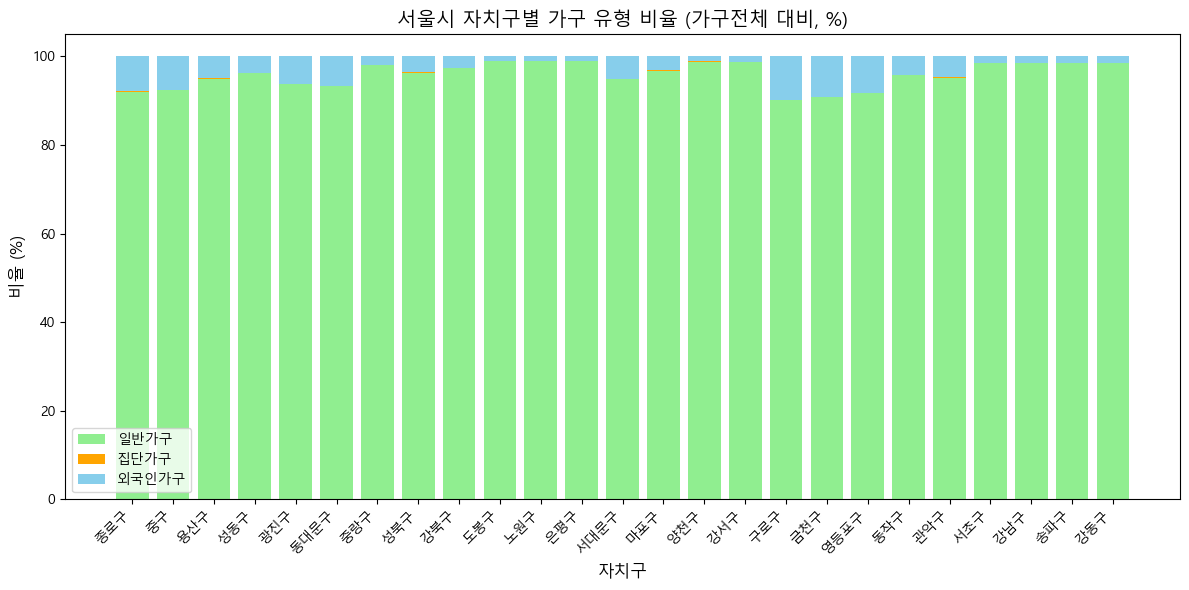

     자치구    가구전체    일반가구  일반가구비율(%)  집단가구  집단가구비율(%)  외국인가구  외국인가구비율(%)
0    종로구   70241   64643  92.030296   107   0.152333   5491    7.817372
1     중구   64816   59849  92.336769    93   0.143483   4874    7.519748
2    용산구   98398   93491  95.013110    68   0.069107   4839    4.917783
3    성동구  127631  122894  96.288519    65   0.050928   4672    3.660553
4    광진구  169231  158609  93.723372    78   0.046091  10544    6.230537
5   동대문구  172439  160767  93.231230   146   0.084668  11526    6.684103
6    중랑구  176740  173326  98.068349    75   0.042435   3339    1.889216
7    성북구  191165  184228  96.371198   224   0.117176   6713    3.511626
8    강북구  134478  130929  97.360907    93   0.069156   3456    2.569937
9    도봉구  131159  129841  98.995113    78   0.059470   1240    0.945417
10   노원구  207675  205666  99.032623    99   0.047671   1910    0.919706
11   은평구  200904  198916  99.010473    93   0.046291   1895    0.943237
12  서대문구  145416  137979  94.885707   104   0.071519   7333    5

In [10]:
# 비율 계산
# -------------------------
seoul["일반가구비율(%)"] = (seoul["일반가구"] / seoul["가구전체"]) * 100
seoul["집단가구비율(%)"] = (seoul["집단가구"] / seoul["가구전체"]) * 100
seoul["외국인가구비율(%)"] = (seoul["외국인가구"] / seoul["가구전체"]) * 100

# -------------------------
# 누적 막대그래프
# -------------------------
plt.figure(figsize=(12, 6))

plt.bar(seoul["자치구"], seoul["일반가구비율(%)"], label="일반가구", color="lightgreen")
plt.bar(seoul["자치구"], seoul["집단가구비율(%)"], 
        bottom=seoul["일반가구비율(%)"], label="집단가구", color="orange")
plt.bar(seoul["자치구"], seoul["외국인가구비율(%)"], 
        bottom=seoul["일반가구비율(%)"] + seoul["집단가구비율(%)"], 
        label="외국인가구", color="skyblue")

plt.title("서울시 자치구별 가구 유형 비율 (가구전체 대비, %)", fontsize=14)
plt.xlabel("자치구", fontsize=12)
plt.ylabel("비율 (%)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend()

plt.tight_layout()
plt.show()

# -------------------------
# 결과 확인 (표)
# -------------------------
print(seoul[[
    "자치구", "가구전체", "일반가구", "일반가구비율(%)",
    "집단가구", "집단가구비율(%)", "외국인가구", "외국인가구비율(%)"
]])

In [11]:
# 상관계수 해석의 일반적인 가이드 : 절대값 기준
# 0.0 이하 ~ 0.2 미만 : 상관관계가 없다.
# 0.2 이상 ~ 0.4 미만 : 약간(낮은) 상관관계가 있다.
# 0.4 이상 ~ 0.6 미만 : 보통의 상관관계가 있다.
# 0.6 이상 ~ 0.8 미만 : 강한(높은) 상관관계가 있다.
# 0.8 이상 ~ 1.0 이하 : 매우 강한(높은) 상관관계가 있다.

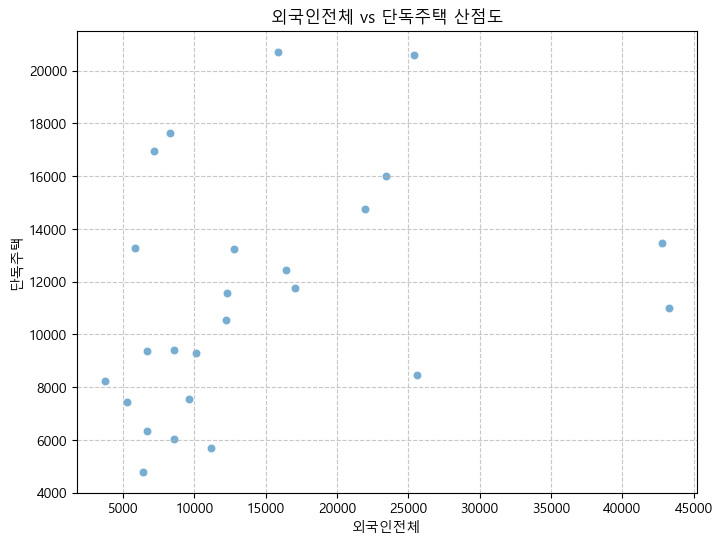

외국인전체와 단독주택전체의 상관계수: 0.3245


In [12]:
# 산점도
plt.figure(figsize=(8,6))
sns.scatterplot(data=seoul, x="외국인전체", y="단독주택", alpha=0.6)

plt.title("외국인전체 vs 단독주택 산점도")
plt.xlabel("외국인전체")
plt.ylabel("단독주택")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# 상관계수 (피어슨)
corr = seoul["외국인전체"].corr(seoul["단독주택"])
print(f"외국인전체와 단독주택전체의 상관계수: {corr:.4f}")

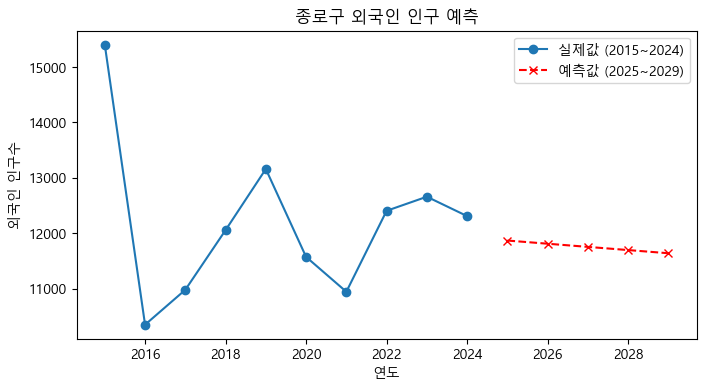

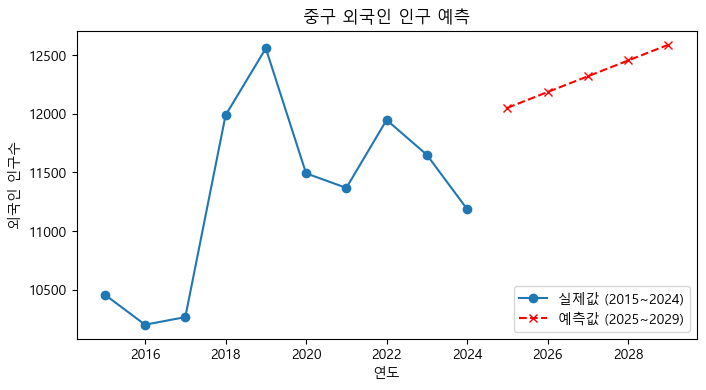

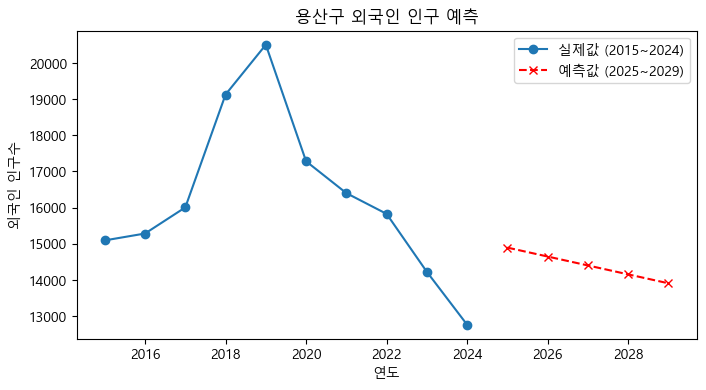

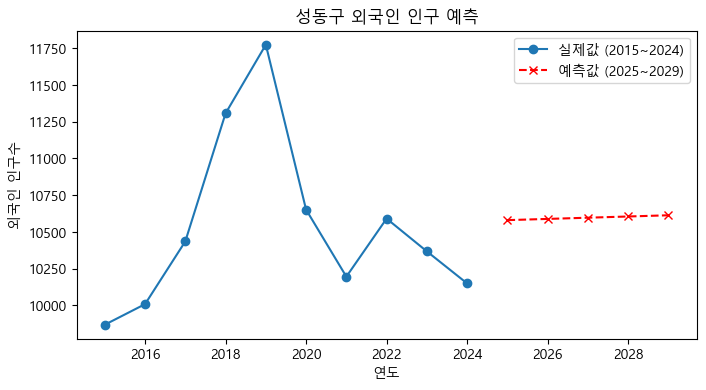

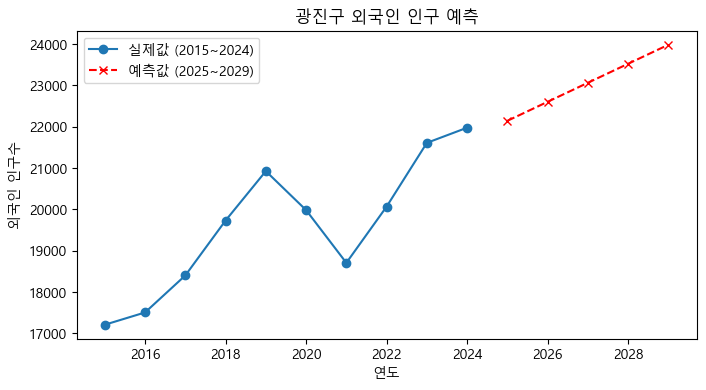

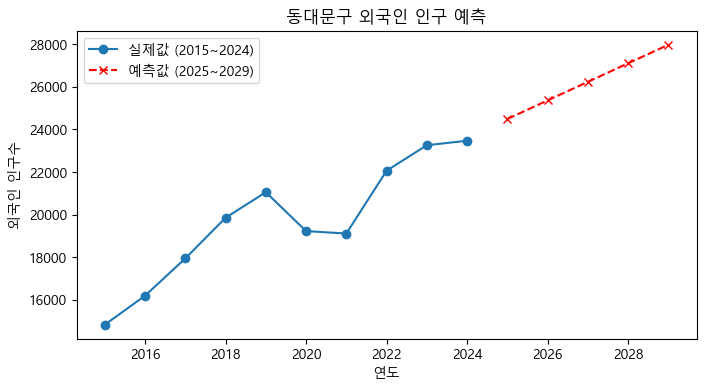

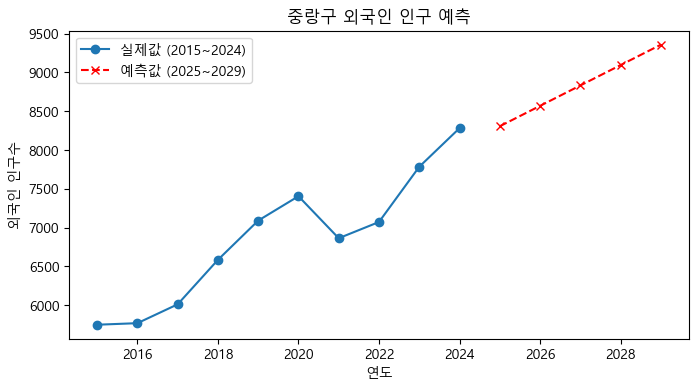

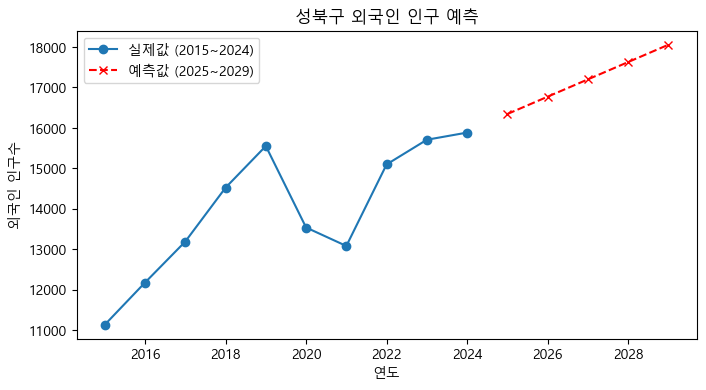

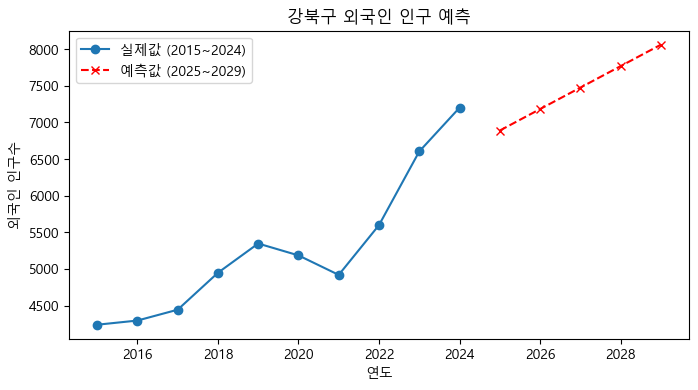

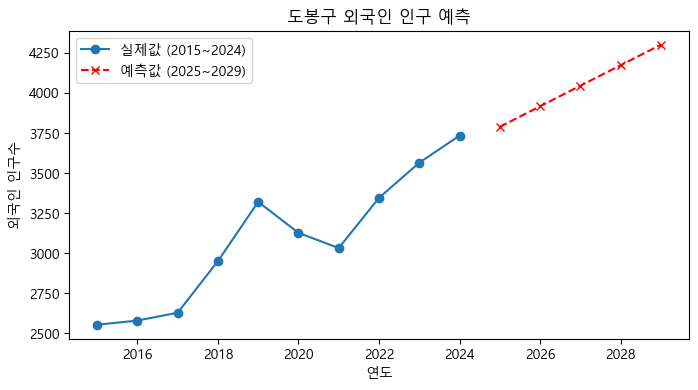

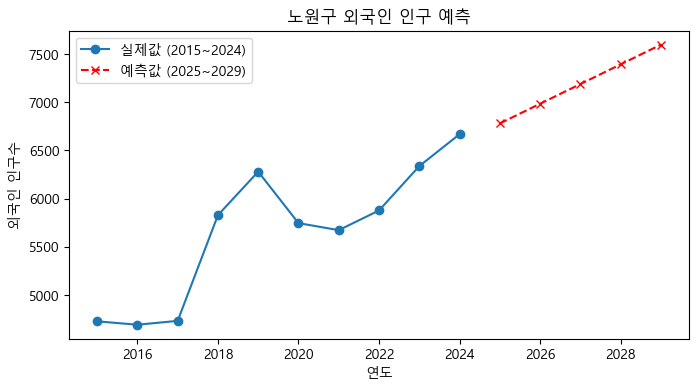

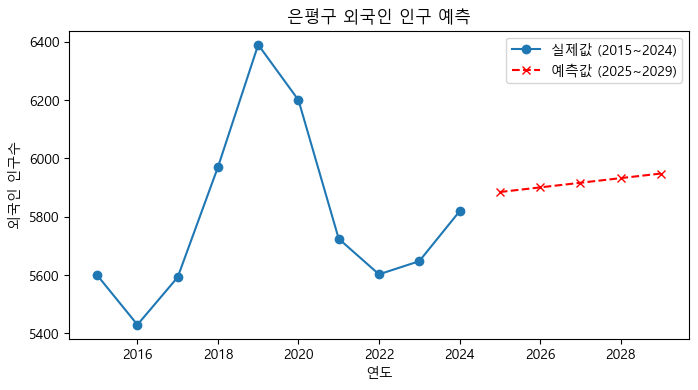

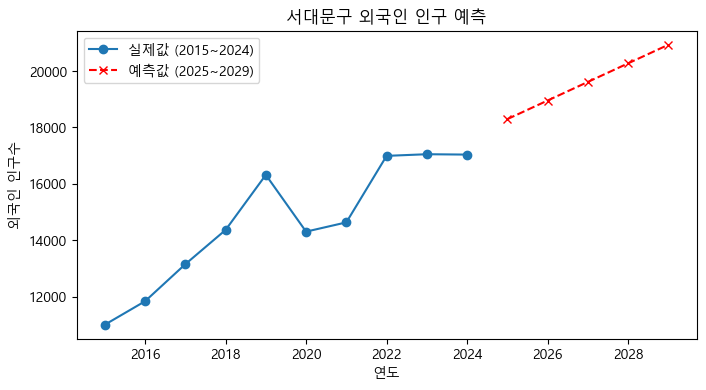

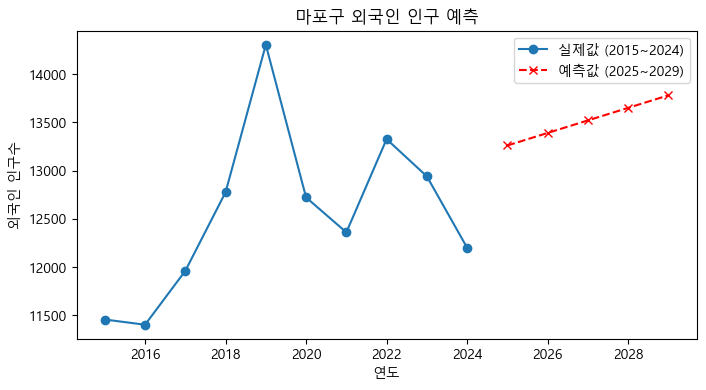

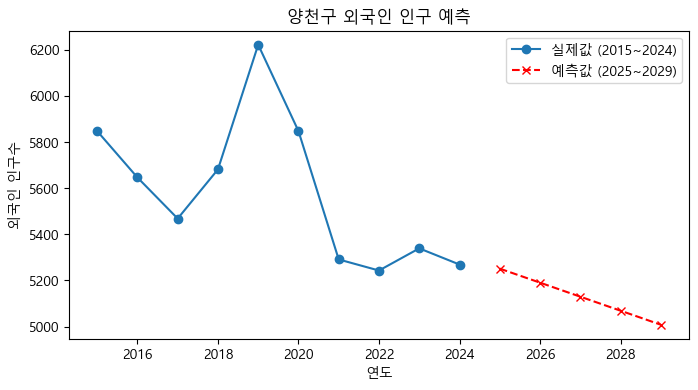

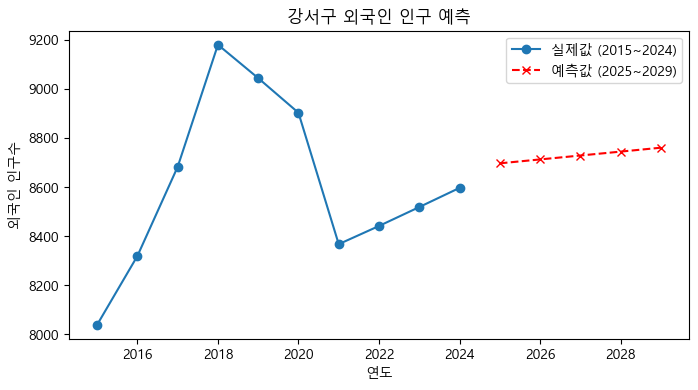

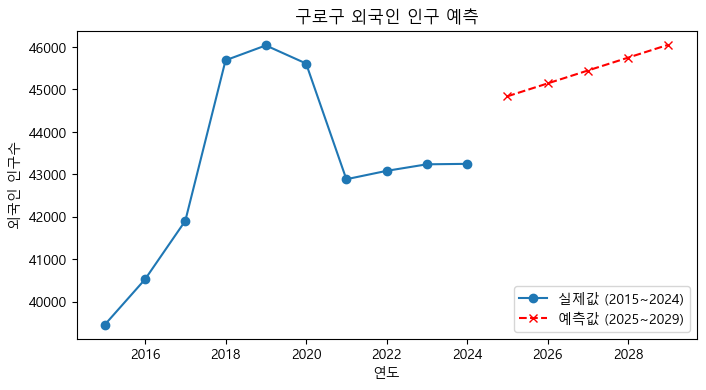

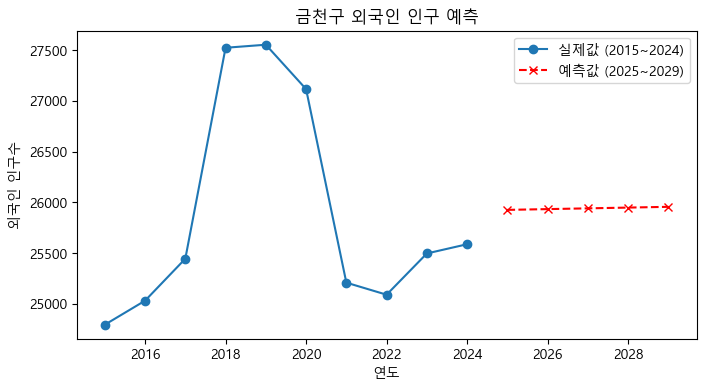

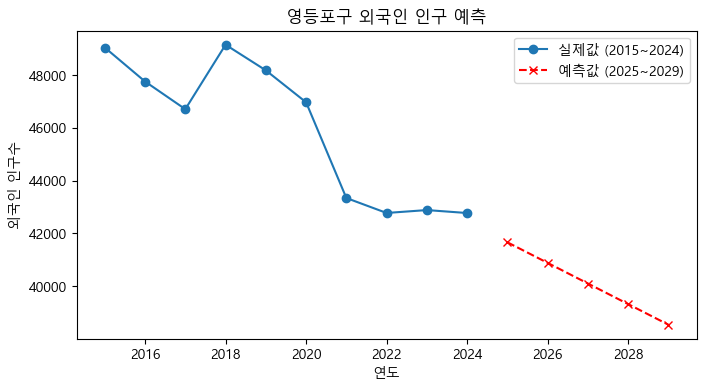

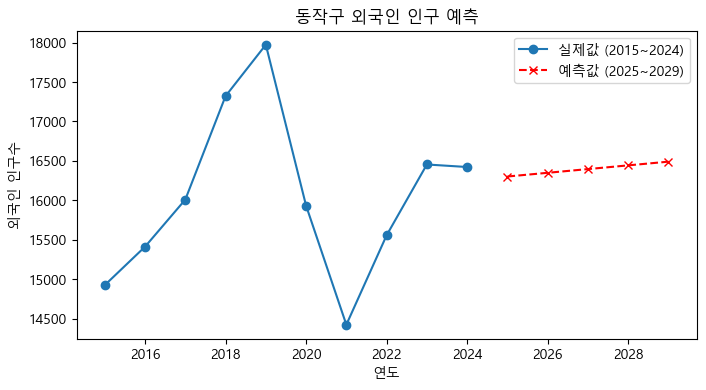

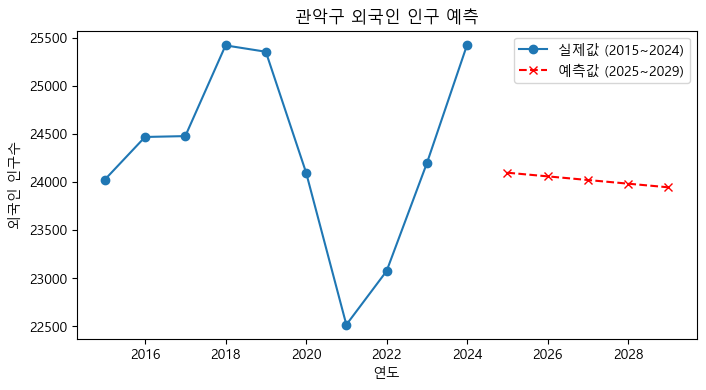

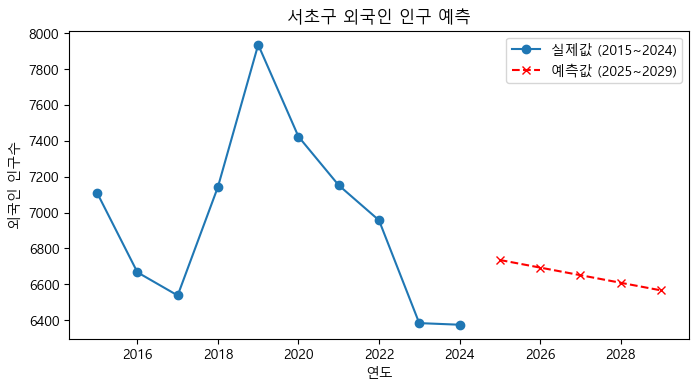

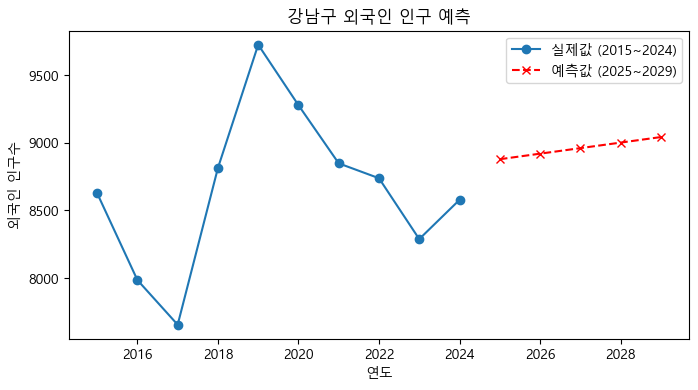

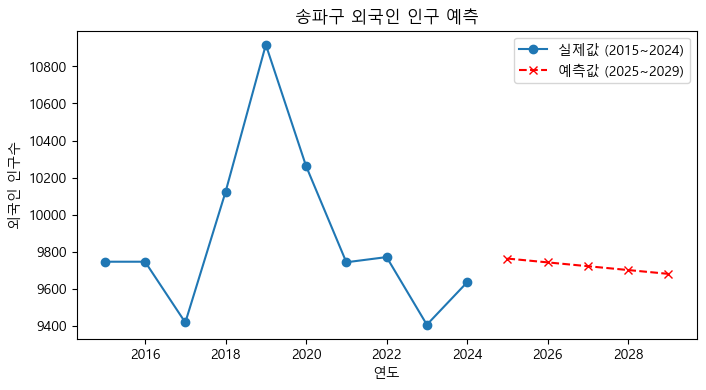

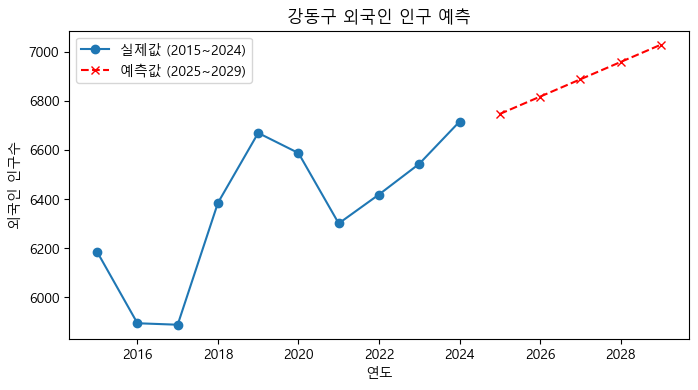

   year  prediction
0  2025        8878
1  2026        8919
2  2027        8960
3  2028        9001
4  2029        9042


In [15]:
# 1. 데이터 불러오기
file_path = r"D:\SEOUL\연도별외국인수.xlsx"
df = pd.read_excel(file_path, index_col=0)  # 행=자치구, 열=2015~2024

# 2. 연도 리스트
years = np.array(df.columns.astype(int)).reshape(-1, 1)  # X (2015~2024)
future_years = np.arange(2025, 2030).reshape(-1, 1)     # 예측 연도 2025~2029

# 3. 자치구별 예측
forecast_results = {}

for district in df.index:
    y = df.loc[district].values  # 해당 자치구 외국인 수
    
    model = LinearRegression()
    model.fit(years, y)
    
    # 예측
    future_preds = model.predict(future_years)
    
    forecast_results[district] = pd.DataFrame({
        "year": future_years.flatten(),
        "prediction": future_preds.astype(int)
    })
    
    # 그래프
    plt.figure(figsize=(8,4))
    plt.plot(years.flatten(), y, marker="o", label="실제값 (2015~2024)")
    plt.plot(future_years.flatten(), future_preds, marker="x", linestyle="--", color="red", label="예측값 (2025~2029)")
    plt.title(f"{district} 외국인 인구 예측")
    plt.xlabel("연도")
    plt.ylabel("외국인 인구수")
    plt.legend()
    plt.show()

# 4. 결과 예시 출력 (강남구)
print(forecast_results["강남구"])